In [1]:
import stac
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import joblib

In [2]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

def specific_plot(scores, method_list, char, alpha=.1):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sig_array = sp.sign_array(scores, alpha)
    sig_array =sig_array.astype(int)
    sp.sign_plot(sig_array, g=method_list,flat=True,**heatmap_args)
    plt.tight_layout()
#     plt.savefig("auc_nemenyi_plot_" + char + ".eps",format="eps")
    plt.savefig("auc_nemenyi_plot_" + char + ".png", dpi=300)

def get_friedman_test_df(corpus):    
    # get a df where
    # rows are datasets in the seasonality/trend/concept drift corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    pbad_column = []
    sarimax_column = []
    stl_column = []
    twitter_column = []
    vae_column = []
    windowed_gaussian_column = []

    mypath = "../dataset_roc_auc_tables/"
    for f in listdir(mypath):
        if f[:-10] in corpus:
            dataset_column.append(f)
            table = joblib.load(mypath + f)

            anomalous = table[table["Anomaly Detection Method"]=="Anomalous"]["Best AUC"].values
            if anomalous:
                anomalous_column.append(anomalous[0])
            else:
                anomalous_column.append(.5)
                # anomalous_column.append(0)

            fb = table[table["Anomaly Detection Method"]=="Prophet"]["Best AUC"].values
            if fb:
                fb_column.append(fb[0])
            else:
                fb_column.append(.5)
                # fb_column.append(0)

            glim = table[table["Anomaly Detection Method"]=="GLiM"]["Best AUC"].values
            if glim:
                glim_column.append(glim[0])
            else:
                glim_column.append(.5)
                # glim_column.append(0)

            hstree = table[table["Anomaly Detection Method"]=="HS Tree"]["Best AUC"].values
            if hstree:
                hstree_column.append(hstree[0])
            else:
                hstree_column.append(.5)
                # hstree_column.append(0)

            htm = table[table["Anomaly Detection Method"]=="HTM"]["Best AUC"].values
            if htm:
                htm_column.append(htm[0])
            else:
                htm_column.append(.5)
                # htm_column.append(0)

            matrix_profile = table[table["Anomaly Detection Method"]=="Matrix Profile"]["Best AUC"].values
            if matrix_profile:
                matrix_profile_column.append(matrix_profile[0])
            else:
                matrix_profile_column.append(.5)
                # matrix_profile_column.append(0)

            pbad = table[table["Anomaly Detection Method"]=="PBAD"]["Best AUC"].values
            if pbad:
                pbad_column.append(pbad[0])
            else:
                pbad_column.append(.5)
                # pbad_column.append(0)

            sarimax = table[table["Anomaly Detection Method"]=="SARIMAX"]["Best AUC"].values
            if sarimax:
                sarimax_column.append(sarimax[0])
            else:
                sarimax_column.append(.5)
                # sarimax_column.append(0)

            stl = table[table["Anomaly Detection Method"]=="STL"]["Best AUC"].values
            if stl:
                stl_column.append(stl[0])
            else:
                stl_column.append(.5)
                # stl_column.append(0)

            twitter = table[table["Anomaly Detection Method"]=="Twitter"]["Best AUC"].values
            if twitter:
                twitter_column.append(twitter[0])
            else:
                twitter_column.append(.5)
                # twitter_column.append(0)

            vae = table[table["Anomaly Detection Method"]=="VAE"]["Best AUC"].values
            if vae:
                vae_column.append(vae[0])
            else:
                vae_column.append(.5)
                # vae_column.append(0)

            windowed_gaussian = table[table["Anomaly Detection Method"]=="Windowed Gaussian"]["Best AUC"].values
            if windowed_gaussian:
                windowed_gaussian_column.append(windowed_gaussian[0])
            else:
                windowed_gaussian_column.append(.5)
                # windowed_gaussian_column.append(0)


    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "PBAD": pbad_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "Twitter": twitter_column,
                       "VAE": vae_column,
                       "Windowed Gaussian": windowed_gaussian_column})

    display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df

def get_friedman_test_df_miss(corpus):    
    # get a df where
    # rows are datasets in the missing corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    sarimax_column = []
    stl_column = []
    vae_column = []

    mypath = "../dataset_roc_auc_tables/"
    for f in listdir(mypath):
        if f[:-10] in corpus:
            dataset_column.append(f)
            table = joblib.load(mypath + f)

            anomalous = table[table["Anomaly Detection Method"]=="Anomalous"]["Best AUC"].values
            if anomalous:
                anomalous_column.append(anomalous[0])
            else:
                anomalous_column.append(.5)
                # anomalous_column.append(0)

            fb = table[table["Anomaly Detection Method"]=="Prophet"]["Best AUC"].values
            if fb:
                fb_column.append(fb[0])
            else:
                fb_column.append(.5)
                # fb_column.append(0)

            glim = table[table["Anomaly Detection Method"]=="GLiM"]["Best AUC"].values
            if glim:
                glim_column.append(glim[0])
            else:
                glim_column.append(.5)
                # glim_column.append(0)

            hstree = table[table["Anomaly Detection Method"]=="HS Tree"]["Best AUC"].values
            if hstree:
                hstree_column.append(hstree[0])
            else:
                hstree_column.append(.5)
                # hstree_column.append(0)

            htm = table[table["Anomaly Detection Method"]=="HTM"]["Best AUC"].values
            if htm:
                htm_column.append(htm[0])
            else:
                htm_column.append(.5)
                # htm_column.append(0)

            matrix_profile = table[table["Anomaly Detection Method"]=="Matrix Profile"]["Best AUC"].values
            if matrix_profile:
                matrix_profile_column.append(matrix_profile[0])
            else:
                matrix_profile_column.append(.5)
                # matrix_profile_column.append(0)



            sarimax = table[table["Anomaly Detection Method"]=="SARIMAX"]["Best AUC"].values
            if sarimax:
                sarimax_column.append(sarimax[0])
            else:
                sarimax_column.append(.5)
                # sarimax_column.append(0)

            stl = table[table["Anomaly Detection Method"]=="STL"]["Best AUC"].values
            if stl:
                stl_column.append(stl[0])
            else:
                stl_column.append(.5)
                # stl_column.append(0)



            vae = table[table["Anomaly Detection Method"]=="VAE"]["Best AUC"].values
            if vae:
                vae_column.append(vae[0])
            else:
                vae_column.append(.5)
                # vae_column.append(0)




    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "VAE": vae_column})

    display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df

In [3]:
# get characteristic corpora

seasonality_path = "../../datasets_seasonality/"
seasonality_corpus = []
for dataset in listdir(seasonality_path):
    seasonality_corpus.append(dataset)
# print(seasonality_corpus)

trend_path = "../../datasets_trend/"
trend_corpus = []
for dataset in listdir(trend_path):
    trend_corpus.append(dataset)
# print(trend_corpus)

conceptdrift_path = "../../datasets_conceptdrift/"
conceptdrift_corpus = []
for dataset in listdir(conceptdrift_path):
    conceptdrift_corpus.append(dataset)
# print(conceptdrift_corpus)

missing_path = "../../datasets_missing/"
missing_corpus = []
for dataset in listdir(missing_path):
    missing_corpus.append(dataset)
# print(missing_corpus)

# Seasonality

In [4]:
df = get_friedman_test_df(seasonality_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


,Dataset,Anomalous,Prophet,GLiM,HS Tree,HTM,Matrix Profile,PBAD,SARIMAX,STL,Twitter,VAE,Windowed Gaussian
0,artificial_cd_2_filled.csv_auc_table,0.559989,0.747977,0.964216,0.552699,0.847866,0.541364,0.683733,0.490862,0.863351,0.489955,0.969657,0.909807
1,FARM_filled.csv_auc_table,0.498867,0.604955,0.630712,0.785935,0.639663,0.918649,0.257761,0.517562,0.610394,0.500000,0.940781,0.891042
2,ec2_cpu_utilization_5f5533_filled.csv_auc_table,0.748883,0.997022,0.999504,0.999690,1.000000,0.984864,0.893797,0.965261,0.500000,0.499876,0.999194,0.999504
3,international-airline-passengers_filled.csv_au...,0.465035,0.996503,0.996503,0.363636,0.500000,0.986014,0.993007,0.993007,0.993007,1.000000,0.996503,0.993007
4,Twitter_volume_GOOG_filled.csv_auc_table,0.499684,0.930010,0.987175,0.978367,0.905709,0.500000,0.494728,0.982589,0.883050,0.740087,0.975833,0.978793
5,artificial_cd_1_filled.csv_auc_table,0.493726,0.854454,0.993726,0.603304,0.777499,0.799247,0.704517,0.442493,0.431200,0.500000,0.985780,0.923881
6,Twitter_volume_FB_filled.csv_auc_table,0.999747,0.998484,0.998516,1.000000,0.999810,0.802634,0.472112,0.998421,0.998484,0.990083,0.998421,0.998516
7,elb_request_count_8c0756_filled.csv_auc_table,0.748886,0.935178,0.951895,0.970654,0.928616,0.978826,0.380510,0.959262,0.968673,0.744676,0.971273,0.968611
8,all_data_gift_certificates_filled.csv_auc_table,0.499431,0.799264,0.944805,0.963899,0.796720,0.768781,0.365050,0.958433,0.953081,0.823483,0.831264,0.948184
9,ambient_temperature_system_failure_filled.csv_...,0.499366,0.996196,0.995879,0.999398,0.991504,0.969947,0.005009,0.625666,0.716396,0.500000,0.995308,0.999620


Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


In [5]:
# At this point, we should only continue if H0 was rejected
if not reject:
    raise Exception("Exiting early. The rankings are only relevant if there was a difference in the means i.e. if we rejected h0 above")

In [6]:
data

array([[0.55998884, 0.74797712, 0.96421596, 0.5526995 , 0.84786551,
        0.5413644 , 0.68373326, 0.49086217, 0.863351  , 0.48995536,
        0.96965681, 0.90980748],
       [0.49886698, 0.60495506, 0.63071229, 0.78593549, 0.63966312,
        0.91864944, 0.25776116, 0.51756175, 0.61039353, 0.5       ,
        0.94078103, 0.89104162],
       [0.74888337, 0.99702233, 0.99950372, 0.99968983, 1.        ,
        0.98486352, 0.89379653, 0.96526055, 0.5       , 0.49987593,
        0.99919355, 0.99950372],
       [0.46503497, 0.9965035 , 0.9965035 , 0.36363636, 0.5       ,
        0.98601399, 0.99300699, 0.99300699, 0.99300699, 1.        ,
        0.9965035 , 0.99300699],
       [0.4996843 , 0.9300101 , 0.98717483, 0.9783669 , 0.90570937,
        0.5       , 0.49472787, 0.98258934, 0.88305026, 0.74008713,
        0.97583344, 0.97879309],
       [0.49372647, 0.8544542 , 0.99372647, 0.60330406, 0.77749895,
        0.79924718, 0.70451694, 0.44249268, 0.43120033, 0.5       ,
        0.98578001,

                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   3.0      0.0  0.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     3.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   2.0      3.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   3.0      0.0  0.0             0.0   
VAE                      3.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        3.0      0.0   0.0      0.0  0.0             0.0   

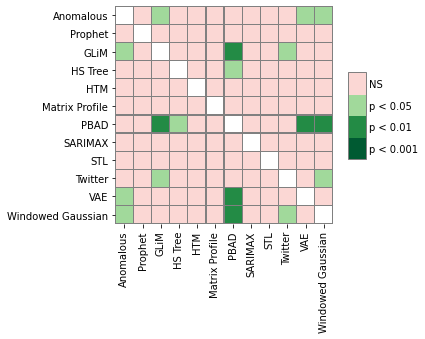

In [7]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

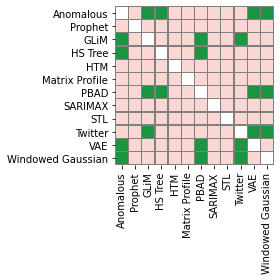

In [8]:
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"seasonality",.1)

In [9]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Trend

In [10]:
df = get_friedman_test_df(trend_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:115: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


,Dataset,Anomalous,Prophet,GLiM,HS Tree,HTM,Matrix Profile,PBAD,SARIMAX,STL,Twitter,VAE,Windowed Gaussian
0,art_daily_flatmiddle_filled.csv_auc_table,0.498760,0.960804,0.991813,0.962788,0.953734,0.497147,0.927934,0.155545,0.975688,0.490077,0.996899,0.098115
1,international-airline-passengers_filled.csv_au...,0.465035,0.996503,0.996503,0.363636,0.500000,0.986014,0.993007,0.993007,0.993007,1.000000,0.996503,0.993007
2,Twitter_volume_GOOG_filled.csv_auc_table,0.499684,0.930010,0.987175,0.978367,0.905709,0.500000,0.494728,0.982589,0.883050,0.740087,0.975833,0.978793
3,art_daily_nojump_filled.csv_auc_table,0.498760,0.295460,0.995907,0.394071,0.432027,0.970479,0.978541,0.678740,0.051104,0.490077,0.855619,0.515505
4,Twitter_volume_FB_filled.csv_auc_table,0.999747,0.998484,0.998516,1.000000,0.999810,0.802634,0.472112,0.998421,0.998484,0.990083,0.998421,0.998516
5,grok_asg_anomaly_filled.csv_auc_table,0.498917,0.988848,0.979320,0.946297,0.939079,0.749206,0.599502,0.973582,0.971344,0.656814,0.961022,0.979789
6,elb_request_count_8c0756_filled.csv_auc_table,0.748886,0.935178,0.951895,0.970654,0.928616,0.978826,0.380510,0.959262,0.968673,0.744676,0.971273,0.968611
7,ec2_cpu_utilization_ac20cd_filled.csv_auc_table,0.498761,0.992815,0.998637,0.979187,0.998142,0.991824,0.009539,0.997151,0.500000,0.490089,0.990956,0.989594
8,ibm-common-stock-closing-prices_filled.csv_auc...,0.496573,0.981494,0.570939,0.233036,0.078478,0.912611,0.759767,0.919808,0.500000,0.500000,0.883482,0.459561
9,Twitter_volume_AMZN_filled.csv_auc_table,0.624716,0.998578,0.998768,0.999163,0.976504,0.603273,0.483604,0.994219,0.995332,0.996399,0.995925,0.998642


Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


In [11]:
# At this point, we should only continue if H0 was rejected
if not reject:
    raise Exception("Exiting early. The rankings are only relevant if there was a difference in the means i.e. if we rejected h0 above")

                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   3.0      0.0  0.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     3.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   2.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   0.0      0.0  0.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        0.0      0.0   0.0      0.0  0.0             0.0   

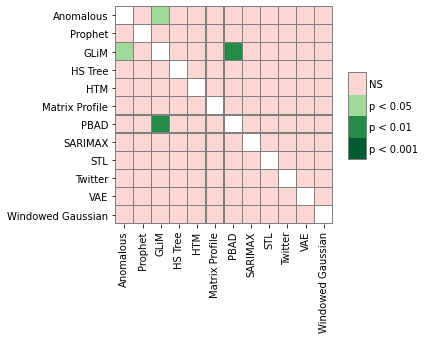

In [12]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

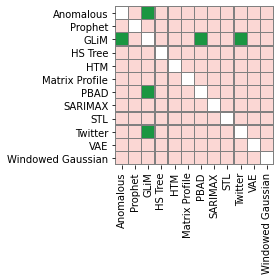

In [13]:
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"trend",.1)

In [14]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Concept Drift

In [15]:
df = get_friedman_test_df(conceptdrift_corpus)
data = np.asarray(df)

alpha = 0.05 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:115: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


,Dataset,Anomalous,Prophet,GLiM,HS Tree,HTM,Matrix Profile,PBAD,SARIMAX,STL,Twitter,VAE,Windowed Gaussian
0,rds_cpu_utilization_cc0c53_filled.csv_auc_table,0.498760,0.996031,0.989581,0.980278,0.987100,0.914971,0.621310,0.995287,0.500000,0.500000,0.990821,0.988837
1,artificial_cd_2_filled.csv_auc_table,0.559989,0.747977,0.964216,0.552699,0.847866,0.541364,0.683733,0.490862,0.863351,0.489955,0.969657,0.909807
2,ec2_cpu_utilization_5f5533_filled.csv_auc_table,0.748883,0.997022,0.999504,0.999690,1.000000,0.984864,0.893797,0.965261,0.500000,0.499876,0.999194,0.999504
3,artificial_cd_1_filled.csv_auc_table,0.493726,0.854454,0.993726,0.603304,0.777499,0.799247,0.704517,0.442493,0.431200,0.500000,0.985780,0.923881
4,grok_asg_anomaly_filled.csv_auc_table,0.498917,0.988848,0.979320,0.946297,0.939079,0.749206,0.599502,0.973582,0.971344,0.656814,0.961022,0.979789
5,ec2_cpu_utilization_ac20cd_filled.csv_auc_table,0.498761,0.992815,0.998637,0.979187,0.998142,0.991824,0.009539,0.997151,0.500000,0.490089,0.990956,0.989594
6,rds_cpu_utilization_e47b3b_filled.csv_auc_table,0.748883,0.989268,0.990447,0.961725,0.995409,0.903412,0.643672,0.995161,0.500000,0.500000,0.996650,0.987965
7,ibm-common-stock-closing-prices_filled.csv_auc...,0.496573,0.981494,0.570939,0.233036,0.078478,0.912611,0.759767,0.919808,0.500000,0.500000,0.883482,0.459561
8,artificial_cd_3_filled.csv_auc_table,0.494980,0.823042,0.992470,0.744227,0.821160,0.852159,0.721888,0.635040,0.500000,0.500000,0.951807,0.908133
9,all_data_gift_certificates_filled.csv_auc_table,0.499431,0.799264,0.944805,0.963899,0.796720,0.768781,0.365050,0.958433,0.953081,0.823483,0.831264,0.948184


Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      2.0   2.0      0.0  0.0             0.0   
Prophet                  2.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     2.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     0.0      0.0   3.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   3.0      0.0  0.0             0.0   
Twitter                  0.0      3.0   2.0      0.0  0.0             0.0   
VAE                      2.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        3.0      0.0   0.0      0.0  0.0             0.0   

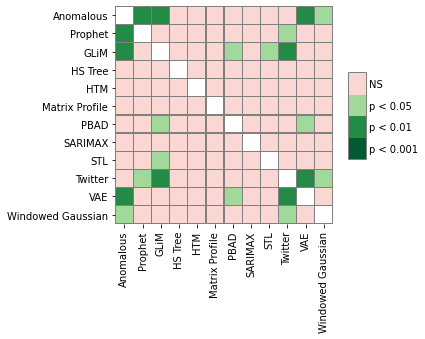

In [16]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

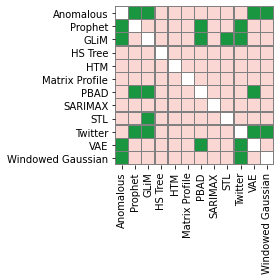

In [17]:
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"conceptdrift",.1)

In [18]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Missing

In [19]:
df = get_friedman_test_df_miss(missing_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:231: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


,Dataset,Anomalous,Prophet,GLiM,HS Tree,HTM,Matrix Profile,SARIMAX,STL,VAE
0,exchange-3_cpc_results_nofill.csv_auc_table,0.496743,0.995005,0.990879,0.995548,0.861672,0.853203,0.992182,0.500000,0.991097
1,exchange-2_cpm_results_nofill.csv_auc_table,0.496915,0.960518,0.994139,0.993831,0.882943,0.890808,0.851789,0.500000,0.997532
2,exchange-3_cpm_results_nofill.csv_auc_table,0.496747,0.999349,0.999349,1.000000,0.932010,0.973975,0.997072,0.500000,0.999024
3,artificial_cd_1_nofill.csv_auc_table,0.493695,0.866330,0.993695,0.609710,0.824926,0.905422,0.759563,0.524170,0.978983
4,ambient_temperature_system_failure_nofill.csv_...,0.499312,0.996008,0.992085,0.997901,0.989745,0.500000,0.654921,0.671025,0.998004
5,exchange-2_cpc_results_nofill.csv_auc_table,0.496917,0.991985,0.997534,0.983970,0.561344,0.959309,0.971640,0.500000,0.998459
6,artificial_cd_3_nofill.csv_auc_table,0.620468,0.843907,0.992447,0.752644,0.630287,0.830312,0.804129,0.500000,0.948389
7,ec2_cpu_utilization_ac20cd_nofill.csv_auc_table,0.998884,0.993550,0.998139,0.979161,0.992682,0.926569,0.996775,0.500000,0.989705
8,elb_request_count_8c0756_nofill.csv_auc_table,0.999007,0.919417,0.952543,0.968610,0.941625,0.797333,0.960918,0.969107,0.954901
9,ibm-common-stock-closing-prices_nofill.csv_auc...,0.500000,0.961271,0.261172,0.259186,0.192651,0.966236,0.816286,0.500000,0.882820


Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


                Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous            -1.0      0.0   0.0      0.0  0.0             0.0   
Prophet               0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                  0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree               0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                   0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile        0.0      0.0   0.0      0.0  0.0            -1.0   
SARIMAX               0.0      0.0   0.0      0.0  0.0             0.0   
STL                   0.0      0.0   3.0      0.0  0.0             0.0   
VAE                   3.0      0.0   0.0      0.0  0.0             0.0   

                SARIMAX  STL  VAE  
Anomalous           0.0  0.0  3.0  
Prophet             0.0  0.0  0.0  
GLiM                0.0  3.0  0.0  
HS Tree             0.0  0.0  0.0  
HTM                 0.0  0.0  0.0  
Matrix Profile      0.0  0.0  0.0  
SARIMAX

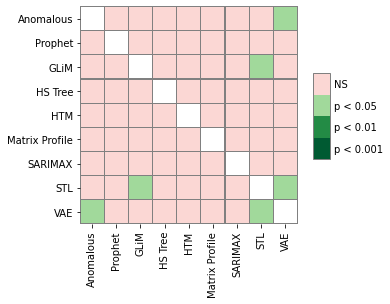

In [20]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

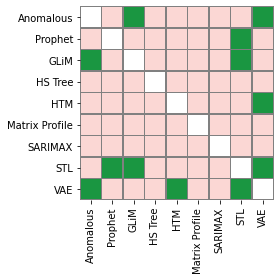

In [21]:
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"missing",.1)

In [22]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)